## Meta - 

This file shows how to perform image dataset augmentation using keras

## Author - Rahul Suresh

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [ ]:
#for standard MNIST dataset

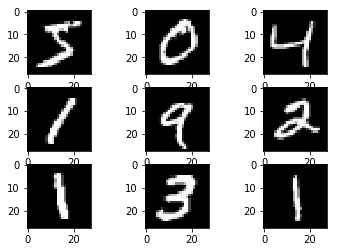

In [47]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

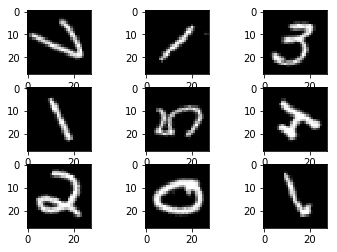

In [49]:
# reshape to be [num_samples][width][height][color_channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

In [ ]:
#Using PIL/Pillow

In [2]:
im = Image.open('catnew.jpeg' )
old_data = np.asarray( im, dtype="int32" )

In [3]:
width,height,depth=old_data.shape

In [4]:
data=old_data

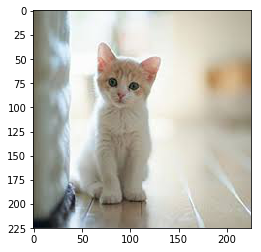

In [5]:
pyplot.imshow(data)

In [6]:
label=[1]

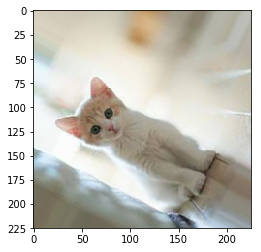

In [7]:
data = data.reshape(1, width, height, depth)
data = data.astype('float32')
data /=255
# define data preparation
datagen2 = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen2.fit(data)
# configure batch size and retrieve one batch of images
for x, y in datagen2.flow(data, label, batch_size=1):
    pyplot.imshow(x.reshape(width, height, depth))
    break

In [ ]:
#now using keras itslef

In [51]:
datagen3 = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('catnew.jpeg') 

In [52]:
image_array = img_to_array(img)  # this is a Numpy array with shape (width, height, color_channels)

In [53]:
width,height,depth=image_array.shape

In [54]:
label=[1]

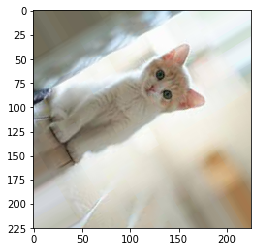

In [55]:
image_array = image_array.reshape(1, width, height, depth)
image_array /=255
# define data preparation
datagen3 = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen3.fit(image_array)
# configure batch size and retrieve one batch of images
for x, y in datagen3.flow(image_array, label, batch_size=1):
    pyplot.imshow(x.reshape(width, height, depth))
    break

In [ ]:
#using many local images will be done shortly